# VAD (Voice Activity Detection) in Python-Part 4

## 7. Floating Point Input to WebRT VAD
While the figure is depicted with the normalized waveform, the actual input samples to is_speech is integer values. a_part_of_raw_samples is a frame partitioned from raw_samples, but omitted for the sake of simplicity.
```python
raw_samples = struct.pack("%dh" % len(samples), *samples)
   ...
is_speech   = self.vad.is_speech( a_part_of_raw_samples, sample_rate=fs )
```

While WebRT VAD works just fine with integer-valued sample, a problem arises when the samples are normalized or filtered. Normalized or filtered samples have floating values. struck.pack's format can be changed to floating values by replace the formatting character from h or short int to f or float as follows. 
```python
raw_samples = struct.pack("%df" % len(samples), *samples)
```
However WebRT VAD expects integer input and does not support float. The following comment is for the C implementation or WebRTC VAD, but the Python interface will just pass the input frame. So I can guess Python also expects int16.

```
WebRtcVad_Process is expecting const int16_t* as the audio frame
```
Source: [webRTC : How to apply webRTC's VAD on audio through samples obtained from WAV file](https://stackoverflow.com/questions/44457162/webrtc-how-to-apply-webrtcs-vad-on-audio-through-samples-obtained-from-wav-fi)




```python
# Preprocess audio data
lowcut  = 50.0
highcut = 2000.0
bandpassed_data = self.filters.bpf( data, lowcut, highcut, fs, order=6)
```

```python
ipdb> bandpassed_data
array([-0.00926745, -0.08785722, -0.37774839, ...,  7.46082969,
        4.06827558,  0.56511622])
```
A trick is to convert

```python
data_type = samples.dtype.name
if data_type == 'float64':
    samples = samples.astype(int)
# Note samples must be integers ('int16'?)
```

### 7.1. Applying VAD after BPF
I was wondering how is the performance of WebRTC VAD when band-passed samples used as the input. The main difference from the code perspective is WebRTC VAD must take in integer samples while a BPF returns floating point values. After a trick to convert floating point values to integers, the result is given in the figure below.

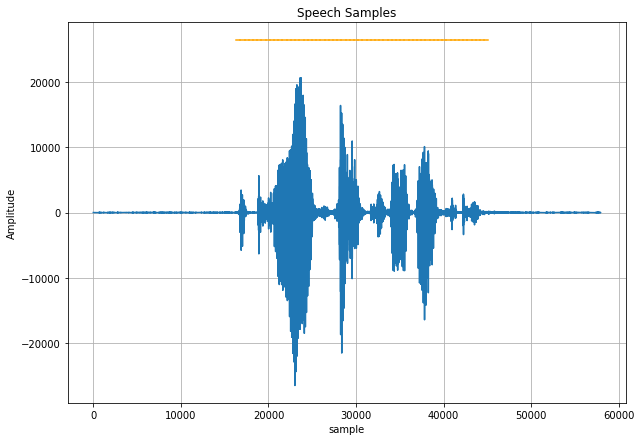

When the actual VAD results are inspected, there is no lull in the orange line. In other words, all of frames are True. I was able to conclude that WebRTC VAD is quite robust.

(EOF)